# AWS Rekognition Face

Detects celebrities in an image. The results are printed and overlayed onto the original image.

<a href="https://aws.amazon.com/documentation/rekognition/">AWS Rekognition Documentation</a>

In [1]:
import boto3
import json
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from PIL import Image
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (16, 9)

In [3]:
colours = ['red', 'lime', 'cyan', 'yellow']

In [4]:
def aws_celebs(image):
    """Function that sends image to AWS Rekognition for
    facial recognition of celebrities. Overlays bounding boxes of detected
    faces onto original image and prints their name."""    
    client = boto3.client('rekognition', 'eu-west-1')
    
    with open(image, 'rb') as img:
        response = client.recognize_celebrities(Image={'Bytes': img.read()})
    
    img = Image.open(image)
    ax = plt.imshow(img)
    for i, faceDetail in enumerate(response['CelebrityFaces']):
        width, height, left, top = faceDetail['Face']['BoundingBox'].values()
        width, left = width * img.width, left * img.width
        height, top = height * img.height, top * img.height
        ul = (left, top)
        ur = (left + width, top)
        lr = (left + width, top + height)
        ll = (left, top + height)
        vertices = [ul, ur, lr, ll]
        patch = Polygon(vertices, closed=True, fill=False,
                        linewidth=3, color=colours[i % 4])
        ax.axes.add_patch(patch)
        plt.text(ul[0], ul[1]-4, faceDetail['Name'], color=colours[i % 4], fontsize=20)
        plt.axis('off')
    plt.show()
    
    return response

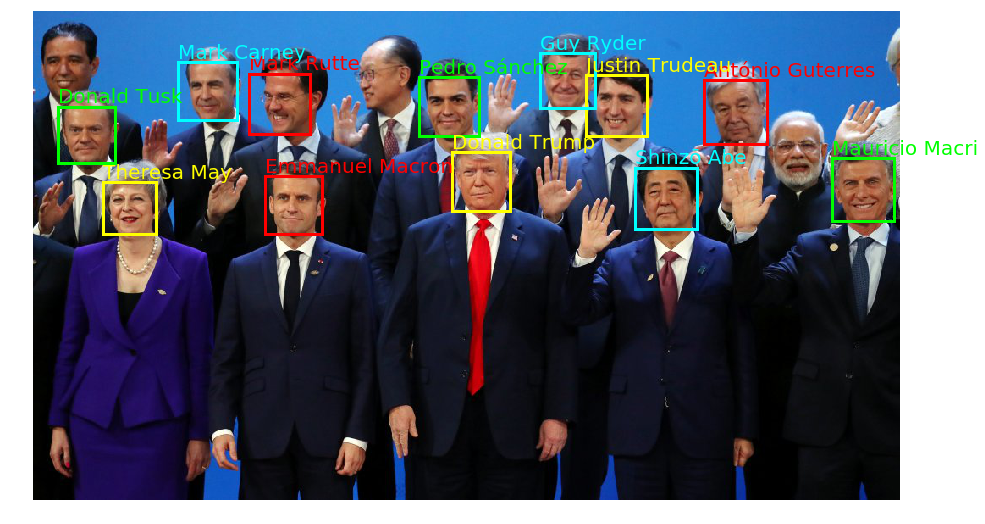

In [5]:
img = 'g20.jpg'
result = aws_celebs(img)